<a href="https://colab.research.google.com/github/anilbhatt1/EVA4P1_S15_MaskRCNN/blob/master/EVA4P1_S15_DataPrep_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-05-09 09:29:30.376404


In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import PIL
import numpy as np
from PIL import Image, ImageOps
import zipfile
import sys

In [0]:
'''
----------------------------------
|    (x_a,y_a)       (x_b,y_b)   |
|    *---------------*           |
|    |               |           |
|    |               |           |
|    *---------------*           |
|    (x_c,y_c)       (x_d,y_d)   |
|                                |
----------------------------------
'''

In [0]:
def pos_generator(bg_size,fg_size,positions):
    lst  = []
    b_width, b_height = bg_size
    f_width, f_height = fg_size
    max_y = b_height - f_height
    max_x = b_width - f_width
    for i in range(positions):
        x = np.random.randint(low=0, high=max_x, size=1)[0]
        y = np.random.randint(low=0, high=max_y, size=1)[0]
        x_a, y_a = x,y 
        x_b, y_b = x + f_width, y
        x_c, y_c = x, y + f_height
        x_d, y_d = x + f_width, y + f_height
        tup = (x,y,b_width,b_height,f_width,f_height,x_a, y_a, x_b, y_b, x_c, y_c, x_d, y_d) 
        lst.append(tup)
    return lst     

In [0]:
def fg_bg_creation(pos_list):
    global i, log_fg_bg, log_fg_bg_mask

    for tup in range(int(positions/2)):
        i += 1      
        x,y = pos_list[tup][0:2]       
        background = Image.open(f'{path_bg}{bg_img}') 
        foreground = Image.open(f'{path_fg}{fg_img}')                                       
        background.paste(foreground, (x, y), foreground)
        fg_bg_img_name  = 'Img_fg_bg_' + str(i) + '.jpg'
        background.save(f'{path_fg_bg}{fg_bg_img_name}')
        string = f'{fg_bg_img_name},{bg_img},{fg_img},' + str(pos_list[tup][2:]) + '\n'
        log_fg_bg.write(string)
                
        foreground = foreground.convert('L')
        foreground = foreground.point(lambda x: 255 if x > 0 else 0 , '1')
        background = Image.open(f'{path_bg}{bg_img}')
        background = background.convert('L')
        background = background.point(lambda x: 0 if x > 0 else 255 , '1')
        background.paste(foreground, (x, y), foreground)
        fg_bg_mask_name  = 'Img_fg_bg_mask' + str(i) + '.jpg'
        background.save(f'{path_fg_bg_mask}{fg_bg_mask_name}')
        string = f'{fg_bg_mask_name},{bg_img},{fg_img},' + str(pos_list[tup][2:]) + '\n'
        log_fg_bg_mask.write(string) 

    for tup in range(int(positions/2),int(positions)):
        i += 1       
        x,y = pos_list[tup][0:2]           
        background  = Image.open(f'{path_bg}{bg_img}')  
        background  = ImageOps.mirror(background)
        foreground  = Image.open(f'{path_fg}{fg_img}')           
        background.paste(foreground, (x, y), foreground)                  
        fg_bg_img_name = 'Img_fg_bg_' + str(i) + '.jpg'
        background.save(f'{path_fg_bg}{fg_bg_img_name}') 
        string = f'{fg_bg_img_name},{bg_img},{fg_img},' + str(pos_list[tup][2:]) + '\n'  
        log_fg_bg.write(string)

        foreground = foreground.convert('L')
        foreground = foreground.point(lambda x: 255 if x > 0 else 0 , '1')
        background = Image.open(f'{path_bg}{bg_img}')
        background = ImageOps.mirror(background)
        background = background.convert('L')
        background = background.point(lambda x: 0 if x > 0 else 255 , '1')        
        background.paste(foreground, (x, y), foreground)
        fg_bg_mask_name  = 'Img_fg_bg_mask' + str(i) + '.jpg'
        background.save(f'{path_fg_bg_mask}{fg_bg_mask_name}')
        string = f'{fg_bg_mask_name},{bg_img},{fg_img},' + str(pos_list[tup][2:]) + '\n'
        log_fg_bg_mask.write(string)                         

In [52]:
path_bg         = '/content/gdrive/My Drive/EVA4P1_S15/BG_Images/'
path_fg         = '/content/gdrive/My Drive/EVA4P1_S15/FG_Images/'
path_fg_bg      = '/content/sample_data/FG_BG/'
path_fg_bg_mask = '/content/sample_data/FG_BG_Mask/'
log_fg_bg       = open('/content/sample_data/FG_BG_Filename_Logs.txt', "w")
log_fg_bg_mask  = open('/content/sample_data/FG_BG_Mask_Filename_Logs.txt', "w")
positions  = 40
i          = 0

print('Image Creation - Start Time:',datetime.now())

for bg_img in os.listdir(path_bg):
    if bg_img.endswith('jpg'):
       for fg_img in os.listdir(path_fg):
           if fg_img.endswith('png'):
              bg = Image.open(f'{path_bg}{bg_img}') 
              fg = Image.open(f'{path_fg}{fg_img}') 
              pos_list   = pos_generator(bg.size, fg.size, positions)
              fg_bg_creation(pos_list)
    if i%50000 == 0:
       print('Progress:',datetime.now(),'Images:',i)

print('Total Images saved:',i)
log_fg_bg.close()
log_fg_bg_mask.close()

Image Creation - Start Time: 2020-05-09 09:31:03.887999
Progress: 2020-05-09 09:42:08.597080 Images: 100000
Progress: 2020-05-09 09:52:08.674283 Images: 200000
Progress: 2020-05-09 10:02:14.880928 Images: 300000
Progress: 2020-05-09 10:12:32.938603 Images: 400000
Total Images saved: 400000


In [53]:
## Quick count check in colab folder
path_file = '/content/sample_data/FG_BG/'
i = 0
for img in os.listdir(path_file):
    if img.endswith('jpg'):
       i += 1
print('Total FG_BG Images:',i)

Total FG_BG Images: 400000


In [54]:
path_file = '/content/sample_data/FG_BG_Mask/'
i = 0
for img in os.listdir(path_file):
    if img.endswith('jpg'):
       i += 1
print('Total Mask Images:',i)

Total Mask Images: 400000


In [0]:
zipname_fg_bg      = 'FG_BG'
zipname_fg_bg_mask = 'FG_BG_Mask'

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])

In [0]:
zipfolder(zipname_fg_bg, '/content/sample_data/')

In [0]:
zipfolder(zipname_fg_bg_mask, '/content/sample_data/')

In [0]:
!cp '/content/sample_data/FG_BG_Filename_Logs.txt' '/content/gdrive/My Drive/EVA4P1_S15/'

In [0]:
!cp '/content/sample_data/FG_BG_Mask_Filename_Logs.txt' '/content/gdrive/My Drive/EVA4P1_S15/'

In [0]:
!cp FG_BG.zip '/content/gdrive/My Drive/EVA4P1_S15/FG_BG/'

In [0]:
!cp FG_BG_Mask.zip '/content/gdrive/My Drive/EVA4P1_S15/FG_BG_Mask/'

In [0]:
#drive.flush_and_unmount()

In [65]:
path_file = '/content/sample_data/FG_BG/'
for i in range(5):
    num = np.random.randint(low=100000, high=400000, size=1)[0]
    fg_bg_img = 'Img_fg_bg_' + str(num) + '.jpg'
    string = (f'{path_file}{fg_bg_img}') 
    print(string)

/content/sample_data/FG_BG/Img_fg_bg_240821.jpg
/content/sample_data/FG_BG/Img_fg_bg_243757.jpg
/content/sample_data/FG_BG/Img_fg_bg_229146.jpg
/content/sample_data/FG_BG/Img_fg_bg_191912.jpg
/content/sample_data/FG_BG/Img_fg_bg_312316.jpg


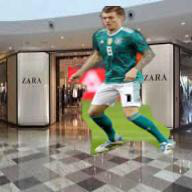

In [88]:
fg_bg  = Image.open('/content/sample_data/FG_BG/Img_fg_bg_9.jpg') 
fg_bg

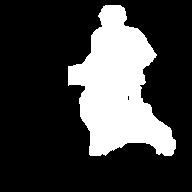

In [89]:
fg_bg_mask  = Image.open('/content/sample_data/FG_BG_Mask/Img_fg_bg_mask9.jpg') 
fg_bg_mask